# GEOG696C Spatiotemporal Data Analysis
## Homework #1
Alex Saunders | Last updated: 3 September 2023

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, colors
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe
from datetime import datetime
import calendar
import scipy
# import matplotlib.ticker as ticker
# from matplotlib.ticker import MultipleLocator

In [2]:
# Set the root path
# rootPath = Path('C:/Users/alexa/Documents/GitHub/dissertation/dissertation')
rootPath = Path('C:/Users/alexsaunders/Documents/01_uoa/04_git/spatiotemporal_data_analysis/00_hw')
dataPath = rootPath/'data'

## 1. Calculating covariance using only basic matrix operations

In [3]:
# Load the x and y data
x = np.array([ -4 , -1 , 1 , 3 , 1 , 6])
y = np.array([ -4 , 2 , -1 , 2 , 2 , 5])

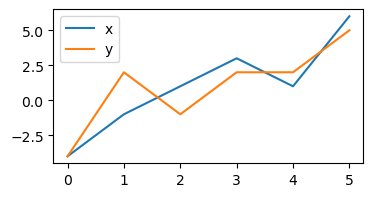

In [4]:
# Quick plot for visual inspection
fig,ax=plt.subplots(figsize=(4,2))
ax.plot(x, label='x')
ax.plot(y, label='y')
# ax.plot(xi, label='xi')
# ax.plot(yi, label='yi')
ax.legend()
plt.show()

In [5]:
# Compute the covariance using matrix operations

# First remove the means
xi = x - x.mean()
yi = y - y.mean()

# Do the dot product and divide by (n-1) where n is length of xi and yi, print result
xy_cov = np.dot(xi.T, yi) / (len(x)-1)
print(xy_cov)

9.0


## 2. Calculating covariance with numpy functions

In [6]:
# Now repeat, this time making use of numpy
xy_cov = np.cov(x, y, ddof=1)
print(xy_cov)

[[11.6  9. ]
 [ 9.   9.6]]


In [7]:
# Compute the variance of x and y to show that np.cov gives us a matrix with both covariance and variance (i.e., covaraince with itself)
xvar = np.var(x, ddof=1)
yvar = np.var(y, ddof=1)
print(xvar, yvar)

11.6 9.6


#### We can see that np.cov provides us with a matrix of covariance on the off-diagonal, and variance (i.e., covariance with itself) on the diagonal

## 3. Covariance with the Iris dataset

In [8]:
# Load the Iris dataset - I will use pandas, show first 5 lines
iris = pd.read_csv(dataPath/'iris.data', sep=',')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species(id)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Plot subplots showing each of the four measurements
Add annotation with regression line and the covariance measure

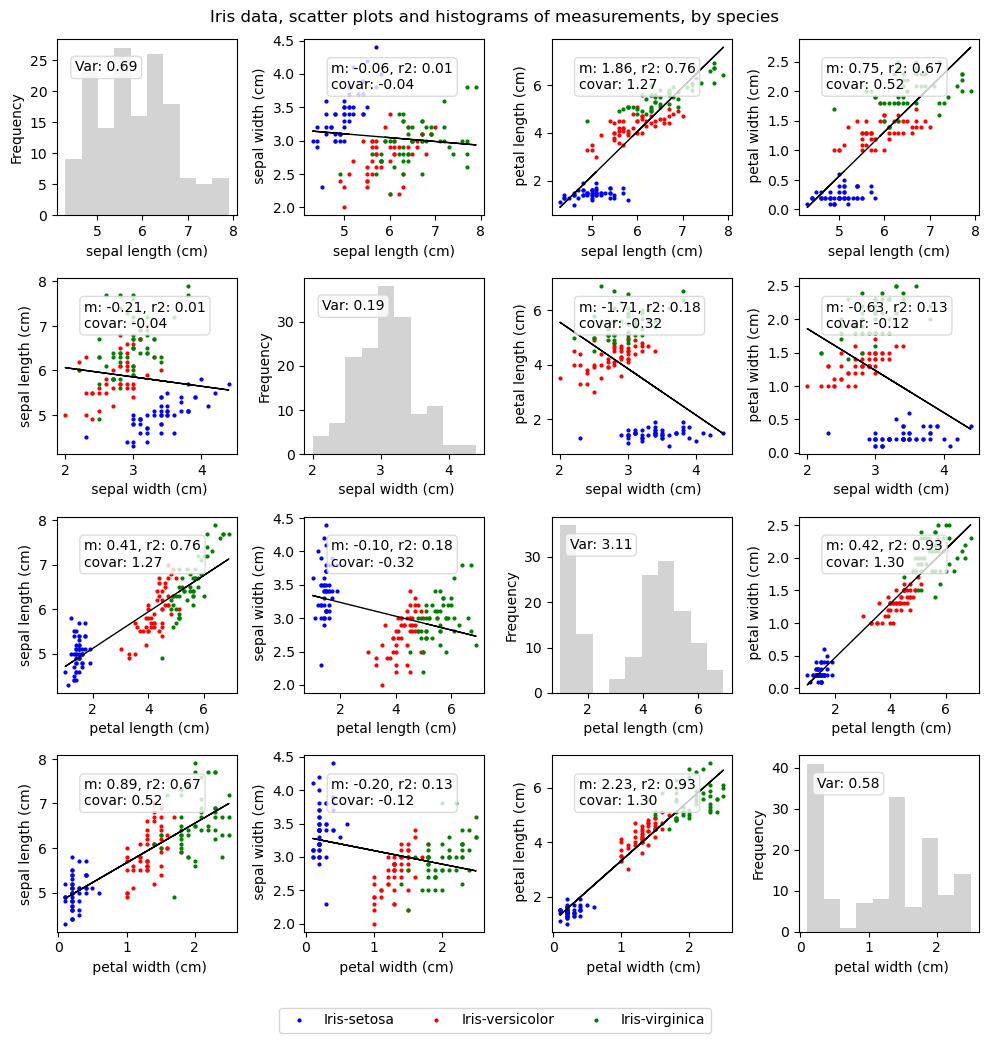

In [9]:
# Get the names of the measurements
names=iris.columns[:-1]

# Get species names
species=np.unique(iris[' species(id)'])

# Set colors for plotting
colors=['b','r','g']

# Create name pairs for the subplots
pairs=[]
for name1 in names:
    for name2 in names:
        # print(name1, name2)
        pair = [name1, name2]
        pairs.append(pair)

# Diagonal indices when flattened are
iDiag = list(range(0, len(names)*len(names), len(names)+1))

# Create subplots
fig, axes = plt.subplots(len(names), len(names), figsize=(10,10))#, constrained_layout=True)
fig.suptitle('Iris data, scatter plots and histograms of measurements, by species')

for i, ax in enumerate(axes.ravel()):
    
    pair=pairs[i]
    name1=pair[0]
    name2=pair[1]
    
    # If on diagonal, plot histogram
    if i in iDiag:
        ax.hist(iris[name1], color='lightgray')
        ax.set_xlabel(name1)
        ax.set_ylabel('Frequency')
        
        # Compute and annotate the variance
        var1 = np.var(iris[name1], ddof=1)
        ax.text(0.1, 0.8, 'Var: {0:.2f}'.format(var1), transform=ax.transAxes, color='k',
            verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', edgecolor='lightgray', alpha=0.8))
        
    # Otherwise, plot the scatter between the two measurements    
    else:
        for j, specie in enumerate(species):
            irisPlot=iris[iris[' species(id)']==specie]
            ax.plot(irisPlot[name1], irisPlot[name2], marker='o', markersize=2, linestyle='none', color=colors[j], label=specie)
        ax.set_xlabel(name1)
        ax.set_ylabel(name2)
        
        # Compute linear regression and covaraicne and add as annotation
        regress = scipy.stats.linregress(iris[name1], iris[name2]) #slope, intercept, r_value, p_value, std_err
        ax.plot(iris[name1], regress[0]*iris[name1]+regress[1], color = 'k', linewidth=1, zorder=3)
        
        covar=np.cov(iris[name1], iris[name2], ddof=1)[0,1]

        # Add annotation with slope and correlation values
        regressString = 'm: {0:1.2f}, r2: {1:1.2f}\ncovar: {2:1.2f}'.format(regress[0], regress[2]**2, covar)
        ax.text(0.15, 0.7, regressString, transform=ax.transAxes, color='k',
            verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', edgecolor='lightgray', alpha=0.8))


# Add a single legend for all subplots
handles, labels = axes.ravel()[1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(species), loc='lower center', bbox_to_anchor=(0.5, -0.05))

# fig.subplots_adjust(bottom=0.2)
fig.tight_layout()

plt.show()

#### We can see from the above plots and covariance (and r-squared) values that where the two measurements increase (and decrease) in tandem with one antoher, we see high covariance. This can also be high but negative, in the cases where one measure increases at the same time the other measure decreases. In other pairs, there is limited dependence, i.e., we cannot discern visually one measure increasing (or decreasing) in conjunction with another measure. These same situations show low covariance clost to zero (e.g., sepal length and sepal width).

## 4) Covariance in sea-surface temperatures

In [10]:
# Load the SST data
sst = pd.read_csv(dataPath/'sst.csv')
sst = sst.set_index('year')
names = sst.columns
sst.head()

,eastern_pacific,north_atlantic,indian_ocean,south_atlantic
year,,,,
1871,24.760,5.0300,26.897,18.417
1872,24.593,5.0167,26.503,18.220
1873,24.040,5.0067,26.550,17.483
1874,23.727,5.0933,26.500,18.077
1875,24.353,5.1933,26.723,17.473


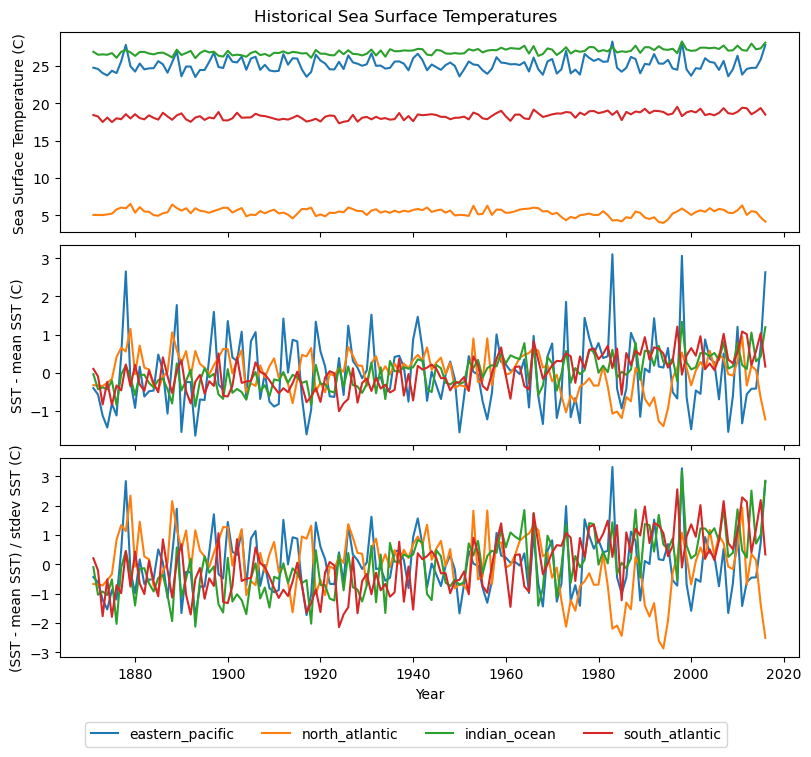

In [11]:
# Show time series
fig, ax =plt.subplots(3, 1, figsize=(8,7), sharex=True, constrained_layout=True)
fig.suptitle('Historical Sea Surface Temperatures')

# Subplot 1 - absolute values
for name in names:
    ax[0].plot(sst[name], label=name)

ax[0].set_ylabel('Sea Surface Temperature (C)') 

# Subplot 2 - normalized values - subtract mean and divide by stdev
for name in names:
    ax[1].plot(sst[name] - sst[name].mean(), label=name)
    
ax[1].set_ylabel('SST - mean SST (C)') 

# Subplot 2 - normalized values - subtract mean and divide by stdev
for name in names:
    ax[2].plot((sst[name] - sst[name].mean()) / sst[name].std() , label=name)

ax[2].set_ylabel('(SST - mean SST) / stdev SST (C)') 
ax[2].set_xlabel('Year')

# Add a single legend for all subplots
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(names), loc='lower center', bbox_to_anchor=(0.5, -0.07))

plt.show()

### Calculate covariance matrix of the tme series using just basic matrix calculation

In [12]:
# Function to create covariance matrix using basic matrix calculation
def calcCovar(x, y):
    xi = x - x.mean()
    yi = y - y.mean()
    
    # Calc var and covar
    xvar = np.var(x, ddof=1)
    yvar = np.var(y, ddof=1)
    xy_cov = np.dot(xi.T, yi) / (len(x)-1)
    
    # Create a matrix
    covarMat = np.array([[xvar, xy_cov], [xy_cov, yvar]])
    
    return covarMat

In [13]:
# Loop through pairs of SST regions and compute covariance matrix and print to screen
covarResults=pd.DataFrame(data=[], index=['pair','covar','var1','var2','covarNmpy','pearsonr','pval']).T
for i, name1 in enumerate(names):
    for j, name2 in enumerate(names):
        
        # Compute covariance matrix, with the function
        covarMat = calcCovar(sst[name1], sst[name2])
        # print(name1, name2)
        # print(covarMat)
        # print()
        
        # Also compute covariance with np.cov
        covarNmpy = np.cov(sst[name1], sst[name2])
        
        # Also compute correlation with scipy Pearsons
        pearsons = scipy.stats.pearsonr(sst[name1], sst[name2])
        
        # Add results to dataframe for easier inspection
        covarResult = pd.DataFrame(data=[(name1+'-'+name2), covarMat[0,1], covarMat[0,0], covarMat[1,1], covarNmpy, pearsons[0], pearsons[1]], 
                                   index=covarResults.columns).T
        covarResults = pd.concat(objs=[covarResults, covarResult])

# Remove duplicates
covarResults = covarResults.drop_duplicates(subset='covar', keep='first').sort_values('pair')
covarResults.set_index('pair', inplace=True)

In [14]:
covarResults

,covar,var1,var2,covarNmpy,pearsonr,pval
pair,,,,,,
eastern_pacific-eastern_pacific,0.877478,0.877478,0.877478,"[[0.8774777759565424, 0.8774777759565424], [0....",1.0,0.0
eastern_pacific-indian_ocean,0.199826,0.877478,0.175531,"[[0.8774777759565424, 0.19982560708549837], [0...",0.509163,0.0
eastern_pacific-north_atlantic,-0.043787,0.877478,0.240293,"[[0.8774777759565424, -0.043787285578649124], ...",-0.095358,0.252239
eastern_pacific-south_atlantic,0.025255,0.877478,0.223477,"[[0.8774777759565424, 0.025254622437411514], [...",0.05703,0.494143
indian_ocean-indian_ocean,0.175531,0.175531,0.175531,"[[0.17553059348134142, 0.17553059348134142], [...",1.0,0.0
indian_ocean-south_atlantic,0.072485,0.175531,0.223477,"[[0.17553059348134142, 0.0724850448748229], [0...",0.365979,0.000006
north_atlantic-indian_ocean,-0.035328,0.240293,0.175531,"[[0.24029315909163915, -0.035328217364194565],...",-0.172018,0.037881
north_atlantic-north_atlantic,0.240293,0.240293,0.240293,"[[0.24029315909163915, 0.24029315909163915], [...",1.0,0.0
north_atlantic-south_atlantic,-0.041845,0.240293,0.223477,"[[0.24029315909163915, -0.041844698549834684],...",-0.180573,0.029177


In [15]:
# Strongest positive
covarResults[covarResults.covar==covarResults.covar.max()]

,covar,var1,var2,covarNmpy,pearsonr,pval
pair,,,,,,
eastern_pacific-eastern_pacific,0.877478,0.877478,0.877478,"[[0.8774777759565424, 0.8774777759565424], [0....",1.0,0.0


In [16]:
# Strongest negative
covarResults[covarResults.covar==covarResults.covar.min()]

,covar,var1,var2,covarNmpy,pearsonr,pval
pair,,,,,,
eastern_pacific-north_atlantic,-0.043787,0.877478,0.240293,"[[0.8774777759565424, -0.043787285578649124], ...",-0.095358,0.252239


In [17]:
# Weakest
covarResults[covarResults.covar==abs(covarResults.covar).min()]

,covar,var1,var2,covarNmpy,pearsonr,pval
pair,,,,,,
eastern_pacific-south_atlantic,0.025255,0.877478,0.223477,"[[0.8774777759565424, 0.025254622437411514], [...",0.05703,0.494143


In [18]:
covarResultsItself=covarResults[[item.split('-')[0]==item.split('-')[1] for item in covarResults.index]]

C:\Users\alexsaunders\AppData\Local\Temp\ipykernel_24824\505743529.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=covarResults.index, rotation=45, ha='right')


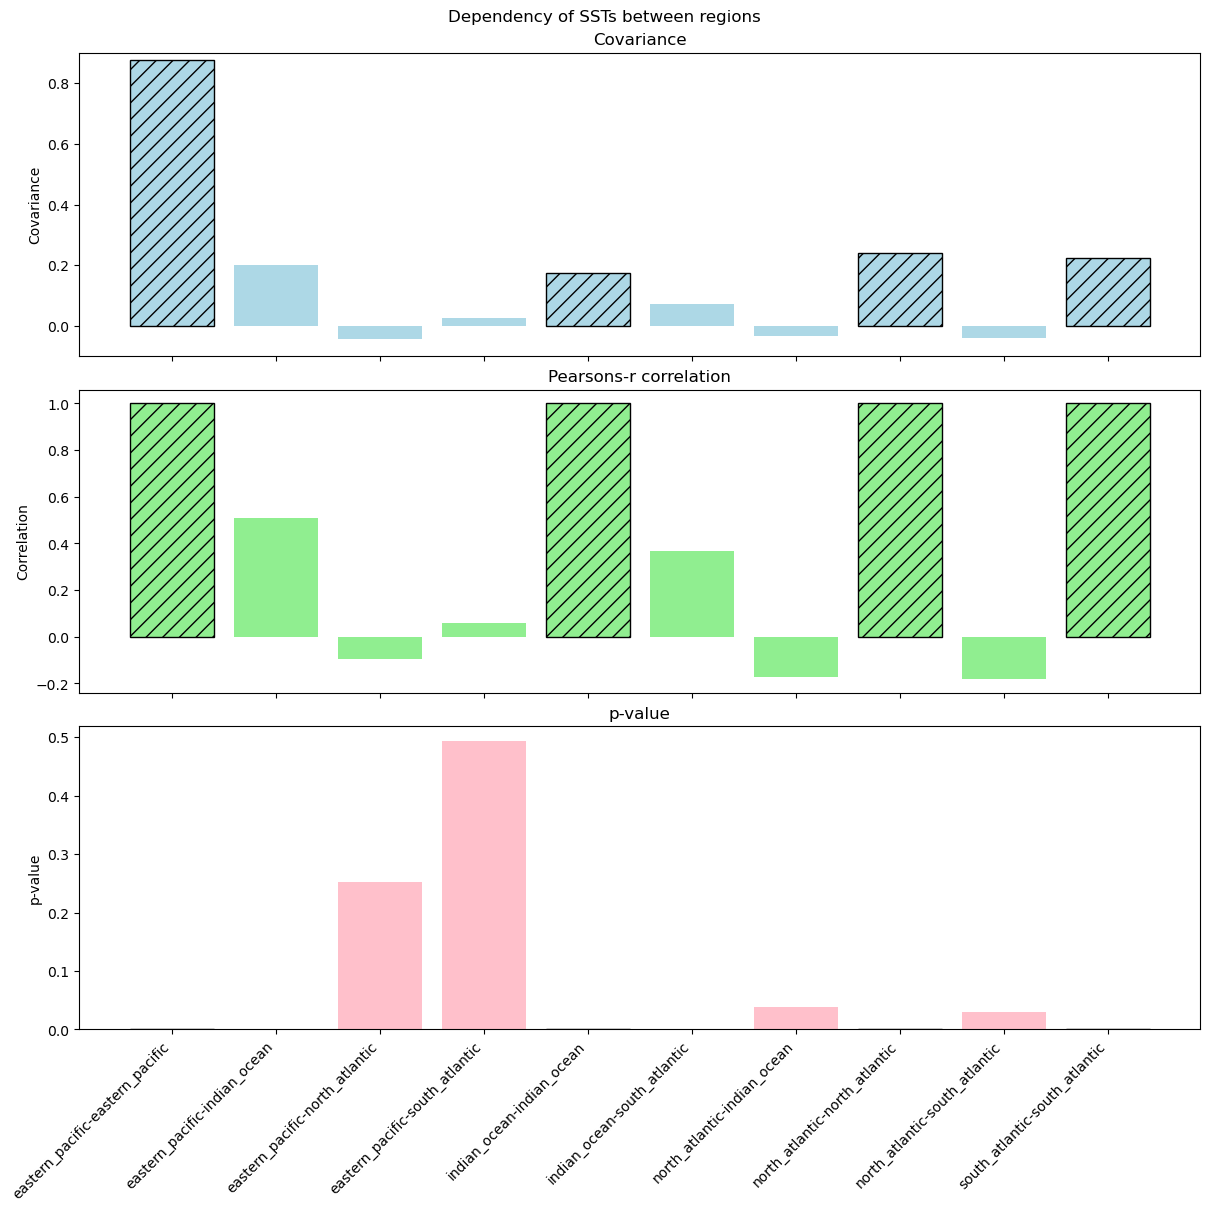

In [20]:
# Show covariance results as simple bar chart
fig, axes = plt.subplots(3, 1, figsize=(12,12), sharex=True, constrained_layout=True)
fig.suptitle('Dependency of SSTs between regions')

ax=axes[0]
ax.set_title('Covariance')
ax.bar(covarResults.index, covarResults.covar, color='lightblue')
ax.bar(covarResultsItself.index, covarResultsItself.covar, facecolor='none', edgecolor='k', hatch='//')
# ax.set_xticklabels(labels=covarResults.index, rotation=45, ha='right')
ax.set_ylim(-0.1,0.9)
ax.set_ylabel('Covariance')

ax=axes[1]
ax.set_title('Pearsons-r correlation')
ax.bar(covarResults.index, covarResults.pearsonr, color='lightgreen')
ax.bar(covarResultsItself.index, covarResultsItself.pearsonr, facecolor='none', edgecolor='k', hatch='//')
# ax.set_xticklabels(labels=covarResults.index, rotation=45, ha='right')
# ax.set_ylim(-0.1,0.9)
ax.set_ylabel('Correlation')

ax=axes[2]
ax.set_title('p-value')
ax.bar(covarResults.index, covarResults.pval, color='pink')
ax.bar(covarResultsItself.index, covarResultsItself.pval, facecolor='none', edgecolor='k', hatch='//')
ax.set_xticklabels(labels=covarResults.index, rotation=45, ha='right')
# ax.set_ylim(-0.1,0.9)
ax.set_ylabel('p-value')
plt.show()


plt.show()

The values on the off-diagonal of the covariance matrix are the covariance between the two pairs of SST regions.

Looking at these values we can see:

1) __strongest positive covariance__: Eastern Pacific and Indian Ocean (0.200)
2) __strongest negative covariance__: Eastern Pacific and North Atlantic (-0.044) (closely followed by North Atlantic and South Atlantic)
3) __weakest covariance (closest to zero)__: Eastern Pacific and North Atlantic (0.025)    

## 5) Anscombe's Quartet

In [21]:
# Create data - copied from the question sheet
x = np . array ([
[10 , 8 , 13 , 9 , 11 , 14 , 6 , 4 , 12 , 7 , 5] ,
[10 , 8 , 13 , 9 , 11 , 14 , 6 , 4 , 12 , 7 , 5] ,
[10 , 8 , 13 , 9 , 11 , 14 , 6 , 4 , 12 , 7 , 5] ,
[8 , 8 , 8 , 8 , 8 , 8 , 8 , 19 , 8 , 8 , 8]])
y = np . array ([
[8.04 , 6.95 , 7.58 , 8.81 , 8.33 , 9.96 , 7.24 , 4.26 , 10.84 , 4.82 , 5.68] ,
[9.14 , 8.14 , 8.74 , 8.77 , 9.26 , 8.1 , 6.13 , 3.1 , 9.13 , 7.26 , 4.74] ,
[7.46 , 6.77 , 12.74 , 7.11 , 7.81 , 8.84 , 6.08 , 5.39 , 8.15 , 6.42 , 5.73] ,
[6.58 , 5.76 , 7.71 , 8.84 , 8.47 , 7.04 , 5.25 , 12.5 , 5.56 , 7.91 , 6.89]])

In [22]:
print(x.shape)
print(y.shape)

(4, 11)
(4, 11)


In [23]:
# Compute the row-wise mean
xmean = np.mean(x, axis=1)
ymean = np.mean(y, axis=1)
print(xmean)
print(ymean)

[9. 9. 9. 9.]
[7.50090909 7.50090909 7.5        7.50090909]


#### The mean of each row is identical to the mean of every other row. Rows of x have higher mean than rows of y

In [24]:
# Compute the row-wise variance
xvar = np.var(x, axis=1)
yvar = np.var(y, axis=1)
print(xvar)
print(yvar)

[10. 10. 10. 10.]
[3.75206281 3.75239008 3.74783636 3.74840826]


#### The variance of each row is identical to the mean of every other row. Rows of x have higher variance than rows of y

In [25]:
# Compute the pearson-r for all pairs of rows in x and y
xyResults=pd.DataFrame(data=[], index=['xRow', 'yRow', 'pearsonsr', 'pval']).T
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        pearsons=scipy.stats.pearsonr(xi, yj)
        xyResult = pd.DataFrame(data=[i, j, pearsons[0], pearsons[1]], index=xyResults.columns).T
        xyResults = pd.concat(objs=[xyResults, xyResult])
        # print(xi, yj, scipy.stats.pearsonr(xi, yj))

In [27]:
xyResults[xyResults.xRow==xyResults.yRow]

,xRow,yRow,pearsonsr,pval
0,0.0,0.0,0.816421,0.002170
0,1.0,1.0,0.816237,0.002179
0,2.0,2.0,0.816287,0.002176
0,3.0,3.0,0.816521,0.002165


#### For matching row pairs (i.e. 1st row of x with 1st row of y etc.), they all have the same correlation result, with strong positive correlation

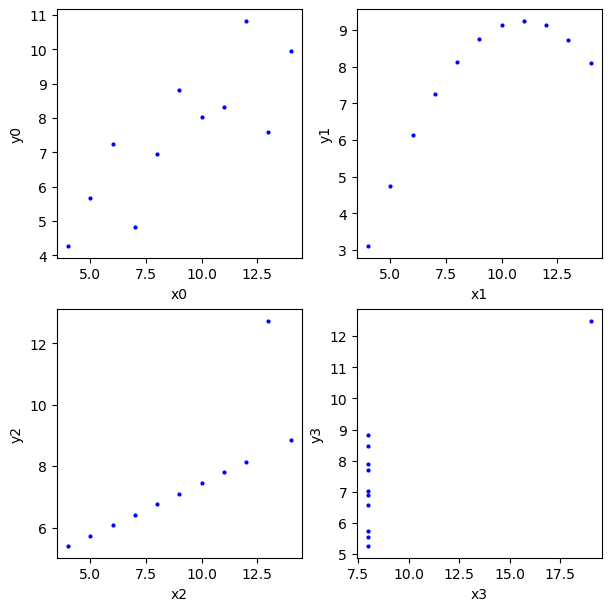

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(6,6), constrained_layout=True)

for i, ax in enumerate(axes.ravel()):
    
    xPlot=x[i]
    yPlot=y[i]
    
    ax.plot(xPlot, yPlot, linestyle='none', marker='o', markersize=2, color='b')
    ax.set_xlabel('x'+str(i))
    ax.set_ylabel('y'+str(i))
    
plt.show()

#### WOW! What we see from this is pretty remarkable!
* Each row of x has the same mean and variance as each other row of x
* Each row of y have the same mean and variance as each other row of y
* Each pair of corresponding row in x and y has the same correlation as each other pair of x and y
* But despite this apparent similarity, the relationships look **completely** different

We have to be careful about looking at correlation alone, since many forms of dependence can exhibit the exact same correlation result. Pearsons r is just one measure of dependency, specificially a measure of linear dependence.

### Add on - let's see if the Spearmans rank correlation exhibits the same limitation

In [29]:
# Compute the pearson-r for all pairs of rows in x and y
xyResults=pd.DataFrame(data=[], index=['xRow', 'yRow', 'spearmans', 'pval']).T
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        spearmans=scipy.stats.spearmanr(xi, yj)
        xyResult = pd.DataFrame(data=[i, j, spearmans[0], spearmans[1]], index=xyResults.columns).T
        xyResults = pd.concat(objs=[xyResults, xyResult])
        # print(xi, yj, scipy.stats.pearsonr(xi, yj))
        
xyResults[xyResults.xRow==xyResults.yRow]

,xRow,yRow,spearmans,pval
0,0.0,0.0,0.818182,2.083145e-03
0,1.0,1.0,0.690909,1.856503e-02
0,2.0,2.0,0.990909,3.762572e-09
0,3.0,3.0,0.500000,1.173068e-01


#### Spearman's rank correlation gives different results for each pairs of rows, unlike the Pearsons moment correlation - Spearmans considers not only linear dependence but also non-linear (i.e. monotonic) dependence, which these x and y pairs exhibit (as we can see in the graphs)